In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import os


dataset = 'nerf_synthetic'
root_dir = os.path.dirname(os.path.dirname(os.getcwd()))

/mnt/data/jiahaolu/poison-splat


In [11]:
def clean_eps16_gauss_maxtv_dir(scene):
    clean_dir = os.path.join(root_dir, f'log/01_main_exp/victim_gs_nerf_synthetic_clean/{scene}/exp_run_1/')
    eps16_dir = os.path.join(root_dir, f'log/01_main_exp/victim_gs_nerf_synthetic_eps16/{scene}/exp_run_1/')
    gauss_dir = os.path.join(root_dir, f'log/04_ablation_3D_consistency/naive_gauss_noise/victim/{scene}/exp_run_1/')
    maxtv_dir = os.path.join(root_dir, f'log/04_ablation_3D_consistency/naive_tv_max/victim/{scene}/exp_run_1/')
    return clean_dir, eps16_dir, gauss_dir, maxtv_dir

def get_records(scene, record_name):
    assert record_name in ['gaussian_num']
    clean_dir, eps16_dir, gauss_dir, maxtv_dir = clean_eps16_gauss_maxtv_dir(scene)
    clean_record = np.load(os.path.join(clean_dir, 'gaussian_num_record.npy'))
    eps16_record = np.load(os.path.join(eps16_dir, 'gaussian_num_record.npy'))
    gauss_record = np.load(os.path.join(gauss_dir, 'gaussian_num_record.npy'))
    maxtv_record = np.load(os.path.join(maxtv_dir, 'gaussian_num_record.npy'))
    return clean_record, eps16_record, gauss_record, maxtv_record

def plot_compare(scene):
    clean_record, eps16_record, gauss_record, maxtv_record = get_records(scene, "gaussian_num")
    plt.figure()
    plt.plot(clean_record, label='clean', c='green')
    plt.plot(eps16_record, label='poison-splat', c='red')
    plt.plot(gauss_record, label='gauss noise', c='blue')
    plt.plot(maxtv_record, label='max TV w/o proxy', c='orange')
    plt.legend()
    plt.xlabel('Training iterations')
    plt.ylabel('Number of Gaussians')
    plt.tight_layout()
    plt.show()
    plt.close()


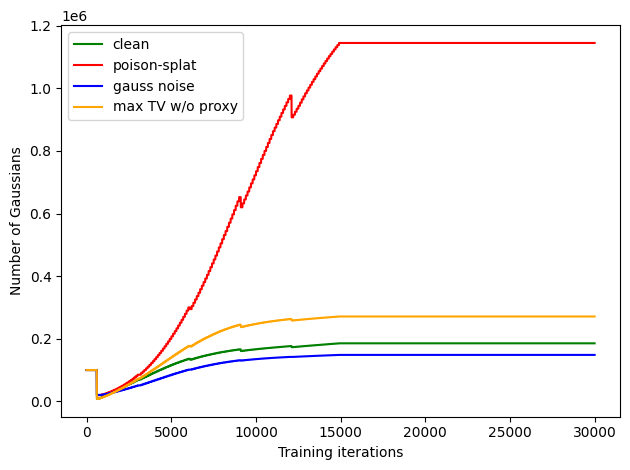

In [12]:
plot_compare('hotdog')